# TP3 GaboG

Para la imagen suministrada "eyes". Implementar un algoritmo que: 

1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en pixeles


In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

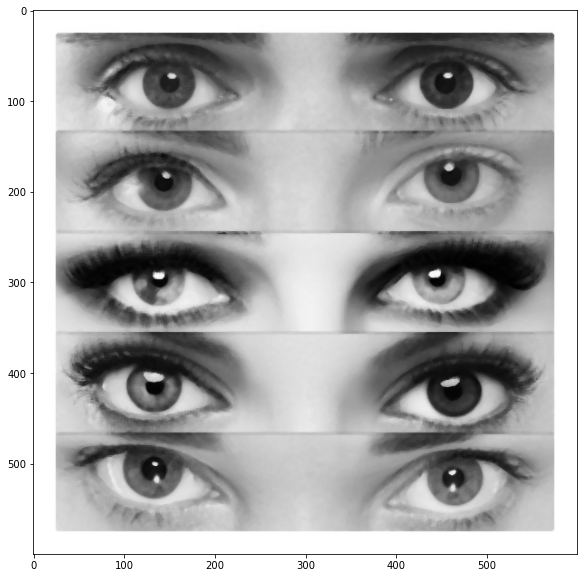

In [2]:
# Leemos la imagen
#=================
img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Aplicamos filtro de mediana
gray = cv.medianBlur(gray,5)
#gray = cv.GaussianBlur(gray,(5,5),0)

plt.figure(figsize= (10,10))
plt.imshow(gray, cmap='gray')

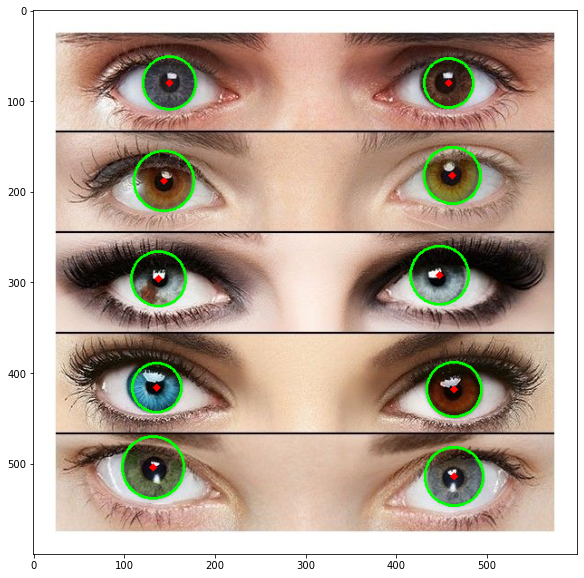

In [3]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=10,param1=100,param2=40,minRadius=10,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize= (10,10))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.show()
#cv.waitKey(0)
#cv.destroyAllWindows()

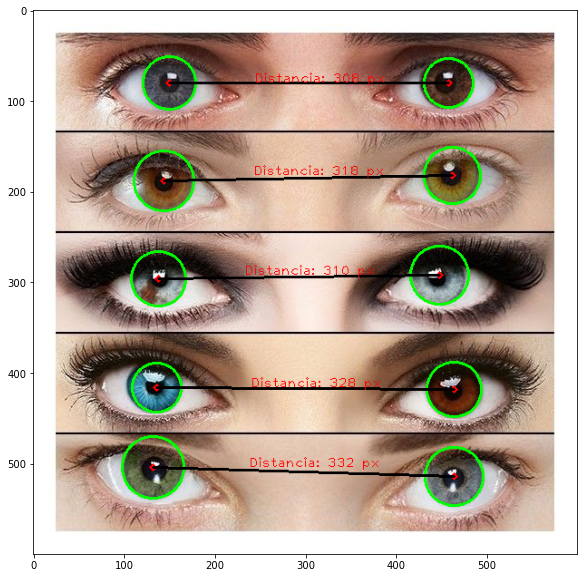

In [4]:
#Ordenamos el array de info de los círculos.
circles_iris = circles.reshape((circles.shape[1],circles.shape[2]))[circles[0,:,1].argsort()]

for i in range(0, circles_iris.shape[0] - 1, 2):

    # Se obtiene cada par de círculos
    circle_i = circles_iris[i,:]
    circle_k = circles_iris[i+1,:]

    # Se calcula la distancia entre los puntos
    dist = round(np.linalg.norm(circle_k[:2].astype(int) - circle_i[:2].astype(int)))

    # Se coloca la línea que une el centro de los círculos
    cv.line(img_out,(circle_i[0],circle_i[1]), (circle_k[0],circle_k[1]), (0,0,0), 2)

    # Se coloca el texto
    cv.putText(img_out, f"Distancia: {dist} px", ((circle_i[0] + circle_k[0])//2-60, min(circle_i[1], circle_k[1])), 1, 1, (0,0,255), 1)


plt.figure(figsize= (10,10))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.show()

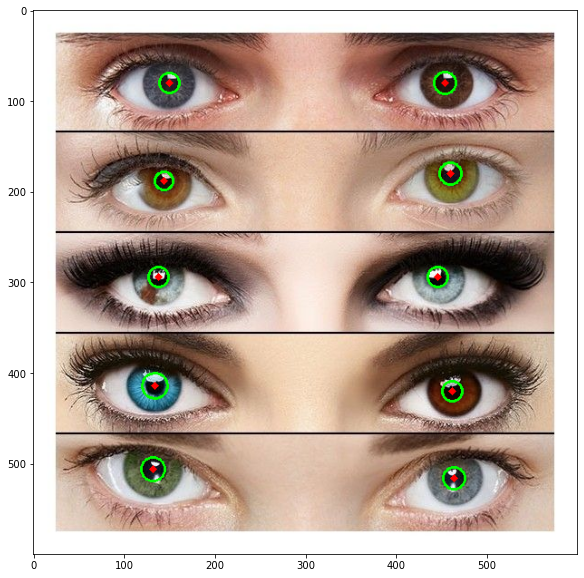

In [5]:
# Pupila
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=20,param1=100,param2=15,minRadius=10 ,maxRadius=15)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize= (10,10))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.show()

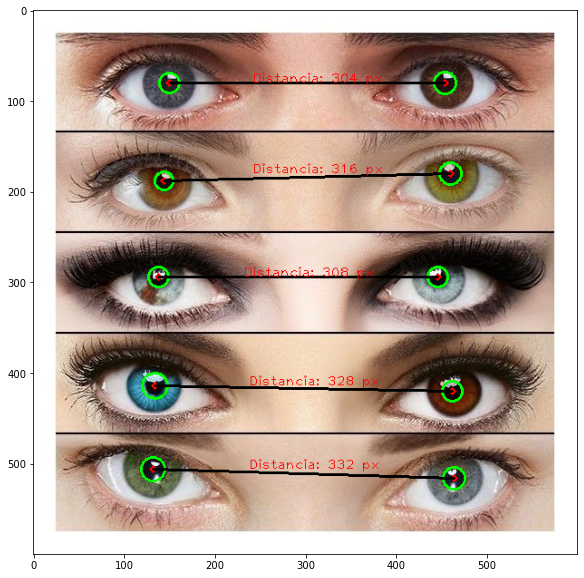

In [6]:
#Ordenamos el array de info de los círculos.
circles_pupil = circles.reshape((circles.shape[1],circles.shape[2]))[circles[0,:,1].argsort()]

for i in range(0, circles_pupil.shape[0] - 1, 2):

    # Se obtiene cada par de círculos
    circle_i = circles_pupil[i,:]
    circle_k = circles_pupil[i+1,:]

    # Se calcula la distancia entre los puntos
    dist = round(np.linalg.norm(circle_k[:2].astype(int) - circle_i[:2].astype(int)))

    # Se coloca la línea que une el centro de los círculos
    cv.line(img_out,(circle_i[0],circle_i[1]), (circle_k[0],circle_k[1]), (0,0,0), 2)

    # Se coloca el texto
    cv.putText(img_out, f"Distancia: {dist} px", ((circle_i[0] + circle_k[0])//2-60, min(circle_i[1], circle_k[1])), 1, 1, (0,0,255), 1)


plt.figure(figsize= (10,10))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.show()